<h1>Table des matières<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Régression-logistique-(statsmodels)" data-toc-modified-id="Régression-logistique-(statsmodels)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Régression logistique (statsmodels)</a></span><ul class="toc-item"><li><span><a href="#Logit-6-variables" data-toc-modified-id="Logit-6-variables-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Logit 6 variables</a></span></li><li><span><a href="#Logit-5-variables" data-toc-modified-id="Logit-5-variables-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Logit 5 variables</a></span></li><li><span><a href="#Logit-4-variables" data-toc-modified-id="Logit-4-variables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Logit 4 variables</a></span></li></ul></li><li><span><a href="#Entraînement-du-modèle-(Scikit-Learn)" data-toc-modified-id="Entraînement-du-modèle-(Scikit-Learn)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Entraînement du modèle (Scikit-Learn)</a></span><ul class="toc-item"><li><span><a href="#Train-test" data-toc-modified-id="Train-test-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Train test</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Confusion matrix</a></span></li></ul></li><li><span><a href="#Algorithme-de-classification" data-toc-modified-id="Algorithme-de-classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Algorithme de classification</a></span><ul class="toc-item"><li><span><a href="#Test-de-l'algorithme" data-toc-modified-id="Test-de-l'algorithme-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Test de l'algorithme</a></span></li><li><span><a href="#Vérification-de-l'algorithme" data-toc-modified-id="Vérification-de-l'algorithme-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Vérification de l'algorithme</a></span></li></ul></li></ul></div>

# Mission 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Apply a fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [2]:
# sépatateurs milliers = , et 3 décimales
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# rappel du fichier
raw = pd.read_csv('data/p_notes.csv', index_col=0)
raw.head(1)

,is_genuine,length,diagonal,height_left,height_right,margin_low,margin_up
id,,,,,,,
0,True,112.83,171.81,104.86,104.95,4.52,2.89


In [4]:
# corrélation entre variables
c = raw[['length','diagonal','height_left','height_right','margin_low','margin_up']]
corr=c.corr().abs() * 100

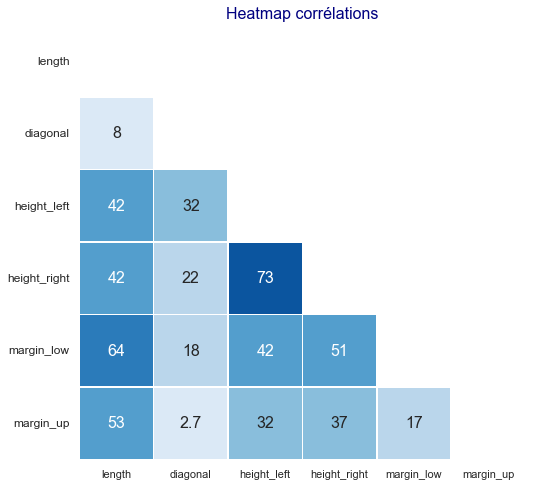

In [5]:
# heatmap corrélations
sns.set_style('whitegrid')

# géneration du masque
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# graphique
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr,mask=mask, vmin=-0, vmax=80,annot=True,annot_kws={"size": 16},cbar=False,linewidths=.5,cmap=sns.color_palette("Blues",6))

# custom
plt.title("Heatmap corrélations", fontsize=16, color = 'navy')
plt.yticks(rotation=90, fontsize="12", va="center")
plt.yticks(rotation=0, fontsize="12", va="center")
plt.savefig('img/P6.3_heatmap_cor.png',dpi=120, bbox_inches='tight')

plt.show()
plt.close()

## Régression logistique (statsmodels)

### Logit 6 variables

In [8]:
# déclaration des variables dépendante et indépendantes
y = raw.is_genuine.astype('int32')
x1 = raw[['length','diagonal','height_left','height_right','margin_low','margin_up']]

* **Le modèle ne converge pas après 35 itérations**
* **Corrélation élevée entre 'height_right et 'height_right' (73%), VIF heigh_left=12,21 => supression de 'height_left'**

### Logit 5 variables

In [9]:
# déclaration des variables dépendante et indépendantes
y = raw.is_genuine.astype('int32')
x1 = raw[['length','diagonal','height_right','margin_low','margin_up']]
x1.head(1)

,length,diagonal,height_right,margin_low,margin_up
id,,,,,
0,112.83,171.81,104.95,4.52,2.89


* **Le modèle ne converge pas après 35 itérations**
* **Corrélation élevée entre 'length' et 'margin_low' (64%), VIF margin_low=7,95 => supression de 'margin_low'**

### Logit 4 variables

In [10]:
# déclaration des variables dépendante et indépendantes
y = raw.is_genuine.astype('int32')
x1 = raw[['length','diagonal','height_right','margin_up']].values

In [13]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.125572
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            4
Date:                Fri, 31 Jan 2020   Pseudo R-squ.:                  0.8147
Time:                        14:58:04   Log-Likelihood:                -21.347
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 1.692e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -402.2483    258.483     -1.556      0.120    -908.865     104.368
x1             3.4597      0.728      4.753      0.000       2.033       4.886
x2             2.9821      1.376      2.167      0.030       0.285       5.679
x3            -4.6289      1.537     -3.011      0.003      -7.642      -1.616
x4            -5.6137      2.695     -2.083      0.037     -10.896      -0.331
==============================================================================
"""

* Log-Likelihood Ratio Test LL-Null p-value est quasi-nul => **Notre modèle est significatif**
* Les ratio P>z (p-values) des variables sont significatifs (5%<)
* coef p(v/f) augmente

In [14]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}".format(x)})
# predicted values
results_log.predict()

array([0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7, 0.9, 1.0, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0,
       0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0,
       0.8, 1.0, 1.0, 1.0, 0.0, 0.3, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 0.9,
       0.8, 1.0, 0.9, 1.0, 1.0, 0.9, 0.8, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 0.0, 0.0, 0.1, 0.0,
       0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.2, 0.1, 0.1,
       0.1, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.6, 0.0, 0.1, 0.0,
       0.0, 0.9, 0.8, 0.0, 0.0, 0.0, 0.0, 0.6, 0.0, 0.1, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0,
       0.0])

In [15]:
# actual values
actual=raw['is_genuine'].astype('int32')
np.array(actual)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Entraînement du modèle (Scikit-Learn)

In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix,roc_auc_score, roc_curve, auc,precision_recall_curve
from sklearn import preprocessing, cluster, linear_model, metrics, model_selection
import joblib


### Train test

In [17]:
x1_train, x1_test, y_train, y_test = model_selection.train_test_split(x1,y,test_size=0.3, random_state=0)

logreg = linear_model.LogisticRegression(random_state=0, solver='liblinear').fit(x1_train, y_train.values.ravel())
predicted = logreg.predict_proba(x1_test)[:,1]

In [18]:
print("Set d'entraînement : %d individus" % x1_train.shape[0])
print("Set de validation :  %d individus" % x1_test.shape[0])
print("Variance expliquée : %.2f" % metrics.explained_variance_score(y_test, predicted))
print("Score Log_loss : %.2f" % metrics.log_loss(y_test, predicted))

Set d'entraînement : 119 individus
Set de validation :  51 individus
Variance expliquée : 0.84
Score Log_loss : 0.17


In [19]:
logreg.predict(x1_test)

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0])

In [20]:
logreg.score(x1_test, y_test)

0.9607843137254902

In [21]:
logreg.predict_proba(x1_test)

array([[0.9, 0.1],
       [0.9, 0.1],
       [0.8, 0.2],
       [0.0, 1.0],
       [0.1, 0.9],
       [0.1, 0.9],
       [0.0, 1.0],
       [0.3, 0.7],
       [1.0, 0.0],
       [0.1, 0.9],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.9, 0.1],
       [0.0, 1.0],
       [0.1, 0.9],
       [0.0, 1.0],
       [1.0, 0.0],
       [0.0, 1.0],
       [0.1, 0.9],
       [1.0, 0.0],
       [0.0, 1.0],
       [0.8, 0.2],
       [1.0, 0.0],
       [0.9, 0.1],
       [0.0, 1.0],
       [0.1, 0.9],
       [0.8, 0.2],
       [0.0, 1.0],
       [0.0, 1.0],
       [0.3, 0.7],
       [0.9, 0.1],
       [0.1, 0.9],
       [0.0, 1.0],
       [1.0, 0.0],
       [0.0, 1.0],
       [0.1, 0.9],
       [0.7, 0.3],
       [1.0, 0.0],
       [0.2, 0.8],
       [0.0, 1.0],
       [0.9, 0.1],
       [0.2, 0.8],
       [1.0, 0.0],
       [0.0, 1.0],
       [0.9, 0.1],
       [0.0, 1.0],
       [0.3, 0.7],
       [0.0, 1.0],
       [1.0, 0.0],
       [0.8, 0.2]])

### Confusion matrix

In [22]:
# régression logistique Scikit-Learn
model = LogisticRegression(solver='lbfgs')
results=model.fit(x1, y)
# confusion matrix Scikit-Learn
conf_mat = confusion_matrix(y, model.predict(x1))
conf_mat

array([[64,  6],
       [ 3, 97]], dtype=int64)

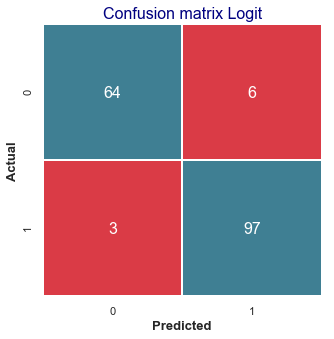

In [24]:
# heatmap
plt.figure(figsize=(5,5))

sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16},
            cmap=sns.diverging_palette(10, 220, sep=80, n=2),linewidths=1, linecolor='white',cbar=False)

plt.title('Confusion matrix Logit', fontsize=16, color='navy')
plt.xlabel('Predicted', size=13, fontweight='bold')
plt.ylabel('Actual', size=13, fontweight='bold')

plt.savefig('img/P6.3_conf_matrix.png', dpi=120, bbox_inches='tight')
plt.show()
plt.close()

## Algorithme de classification

### Test de l'algorithme

In [25]:
# téléchargement du fichier test
#data = pd.read_csv('data/mon_fichier_test.csv')
data = pd.read_csv('data/example.csv')
data

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [26]:
# mise en forme
data.drop(['height_left','margin_low'], axis=1, inplace = True)
data = data[['id','length', 'diagonal', 'height_right','margin_up']]
data

,id,length,diagonal,height_right,margin_up
0,A_1,111.42,171.76,103.54,3.30
1,A_2,112.09,171.87,104.13,3.31
2,A_3,111.57,172.00,104.29,3.39
3,A_4,113.20,172.49,104.34,3.03
4,A_5,113.33,171.65,103.56,3.16


In [27]:
# rappel du fichier échantillon d'origine 'p_notes.csv'
raw.head(2)

,is_genuine,length,diagonal,height_left,height_right,margin_low,margin_up
id,,,,,,,
0,True,112.83,171.81,104.86,104.95,4.52,2.89
1,True,113.29,171.67,103.74,103.70,4.01,2.87


In [28]:
# déclaration des variables dépendante et indépendantes
X = data[['length', 'diagonal', 'height_right','margin_up']].values
y=raw.is_genuine.astype('int32')

In [29]:
# rappel de la régression logistique
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
# probabilité vrai/faux
proba_classes=logreg.predict_proba(X)
proba_classes

array([[0.8, 0.2],
       [0.7, 0.3],
       [0.9, 0.1],
       [0.2, 0.8],
       [0.0, 1.0]])

Proba d'etre vrai

In [31]:
# table des résultats
a=pd.Series(proba_classes[:,1],name='proba')

result =pd.concat([data,a],axis=1)

result['status']=result['proba'] >=0.5
result

,id,length,diagonal,height_right,margin_up,proba,status
0,A_1,111.42,171.76,103.54,3.30,0.20,False
1,A_2,112.09,171.87,104.13,3.31,0.25,False
2,A_3,111.57,172.00,104.29,3.39,0.05,False
3,A_4,113.20,172.49,104.34,3.03,0.80,True
4,A_5,113.33,171.65,103.56,3.16,0.97,True


loader un sample du fichier d'origine

### Vérification de l'algorithme

In [32]:
# échantillon random du fichier 'notes'
test=raw.sample(5).reset_index()
t=test.copy()
t

,id,is_genuine,length,diagonal,height_left,height_right,margin_low,margin_up
0,2,True,113.84,171.83,103.76,103.76,4.40,2.88
1,12,True,112.91,172.19,104.61,103.69,4.00,3.26
2,98,True,113.00,172.10,103.98,103.86,4.47,3.06
3,10,True,113.50,172.27,104.29,104.22,3.89,3.53
4,7,True,113.38,171.58,103.65,103.37,3.54,3.19


In [33]:
# mise en forme
t.drop(['height_left','margin_low'], axis=1, inplace = True)
data = t[['id','length', 'diagonal', 'height_right','margin_up']]
data

,id,length,diagonal,height_right,margin_up
0,2,113.84,171.83,103.76,2.88
1,12,112.91,172.19,103.69,3.26
2,98,113.00,172.10,103.86,3.06
3,10,113.50,172.27,104.22,3.53
4,7,113.38,171.58,103.37,3.19


In [34]:
# déclaration des variables dépendante et indépendantes
X = data[['length', 'diagonal', 'height_right','margin_up']].values
y=raw.is_genuine.astype('int32')

In [35]:
# probabilité vrai/faux
proba_classes=logreg.predict_proba(X)
proba_classes

array([[0.0, 1.0],
       [0.1, 0.9],
       [0.1, 0.9],
       [0.1, 0.9],
       [0.0, 1.0]])

In [36]:
# table des résultats
a=pd.Series(proba_classes[:,1],name='proba')

result =pd.concat([data,a],axis=1)

result['status']=result['proba'] >=0.5
result

,id,length,diagonal,height_right,margin_up,proba,status
0,2,113.84,171.83,103.76,2.88,0.99,True
1,12,112.91,172.19,103.69,3.26,0.87,True
2,98,113.00,172.10,103.86,3.06,0.88,True
3,10,113.50,172.27,104.22,3.53,0.86,True
4,7,113.38,171.58,103.37,3.19,0.98,True
